In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
X = df.drop('class',axis =1)

In [4]:
X = pd.get_dummies(X,drop_first=True,dtype='float')

In [5]:
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = {'n_estimators':[50,100],
             'learning_rate':[0.1,0.05,0.2],
             'max_depth':[3,4,5]}

In [12]:
gb_model = GradientBoostingClassifier()

In [13]:
grid = GridSearchCV(gb_model,param_grid)

In [14]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [15]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [16]:
predictions = grid.predict(X_test)

In [17]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [18]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [20]:
grid.best_estimator_

GradientBoostingClassifier()

In [21]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 2.17881249e-16, 0.00000000e+00, 0.00000000e+00,
       5.96848934e-17, 1.05030313e-03, 2.18029259e-17, 1.23116025e-17,
       3.27339723e-18, 0.00000000e+00, 8.76981855e-18, 0.00000000e+00,
       1.04359714e-17, 0.00000000e+00, 0.00000000e+00, 3.31169081e-06,
       2.31055039e-03, 5.44891433e-02, 6.24175887e-04, 2.13446416e-02,
       1.82499853e-02, 3.31880691e-03, 6.14762854e-01, 9.20844491e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.29231264e-02,
       1.06389315e-02, 0.00000000e+00, 2.89226864e-17, 0.00000000e+00,
       2.72549018e-17, 0.00000000e+00, 0.00000000e+00, 1.69900677e-17,
       2.35956016e-16, 0.00000000e+00, 6.25096099e-18, 1.24029821e-17,
       0.00000000e+00, 7.55862168e-04, 1.36047590e-01, 7.71855052e-03,
       2.71081052e-02, 4.65375385e-04, 2.59824622e-04, 4.95063766e-06,
       0.00000000e+00, 0.00000000e+00, 3.93371481e-02, 2.70047099e-05,
       0.00000000e+00, 0.00000000e+00, 5.50350499e-04, 0.00000000e+00,
      

In [22]:
feat_impt = grid.best_estimator_.feature_importances_

In [23]:
imp_feat = pd.DataFrame(index=X.columns,
                       data=feat_impt,
                       columns=['Importances'])

In [24]:
imp_feat

,Importances
cap-shape_c,2.911502e-04
cap-shape_f,2.178812e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,5.968489e-17
...,...
habitat_l,0.000000e+00
habitat_m,3.709560e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [25]:
imp_feat = imp_feat[imp_feat['Importances']>0.0005]

In [26]:
imp_feat

,Importances
cap-surface_g,0.001050
cap-color_y,0.002311
bruises_t,0.054489
odor_c,0.000624
odor_f,0.021345
odor_l,0.018250
odor_m,0.003319
odor_n,0.614763
odor_p,0.000921
gill-spacing_w,0.012923


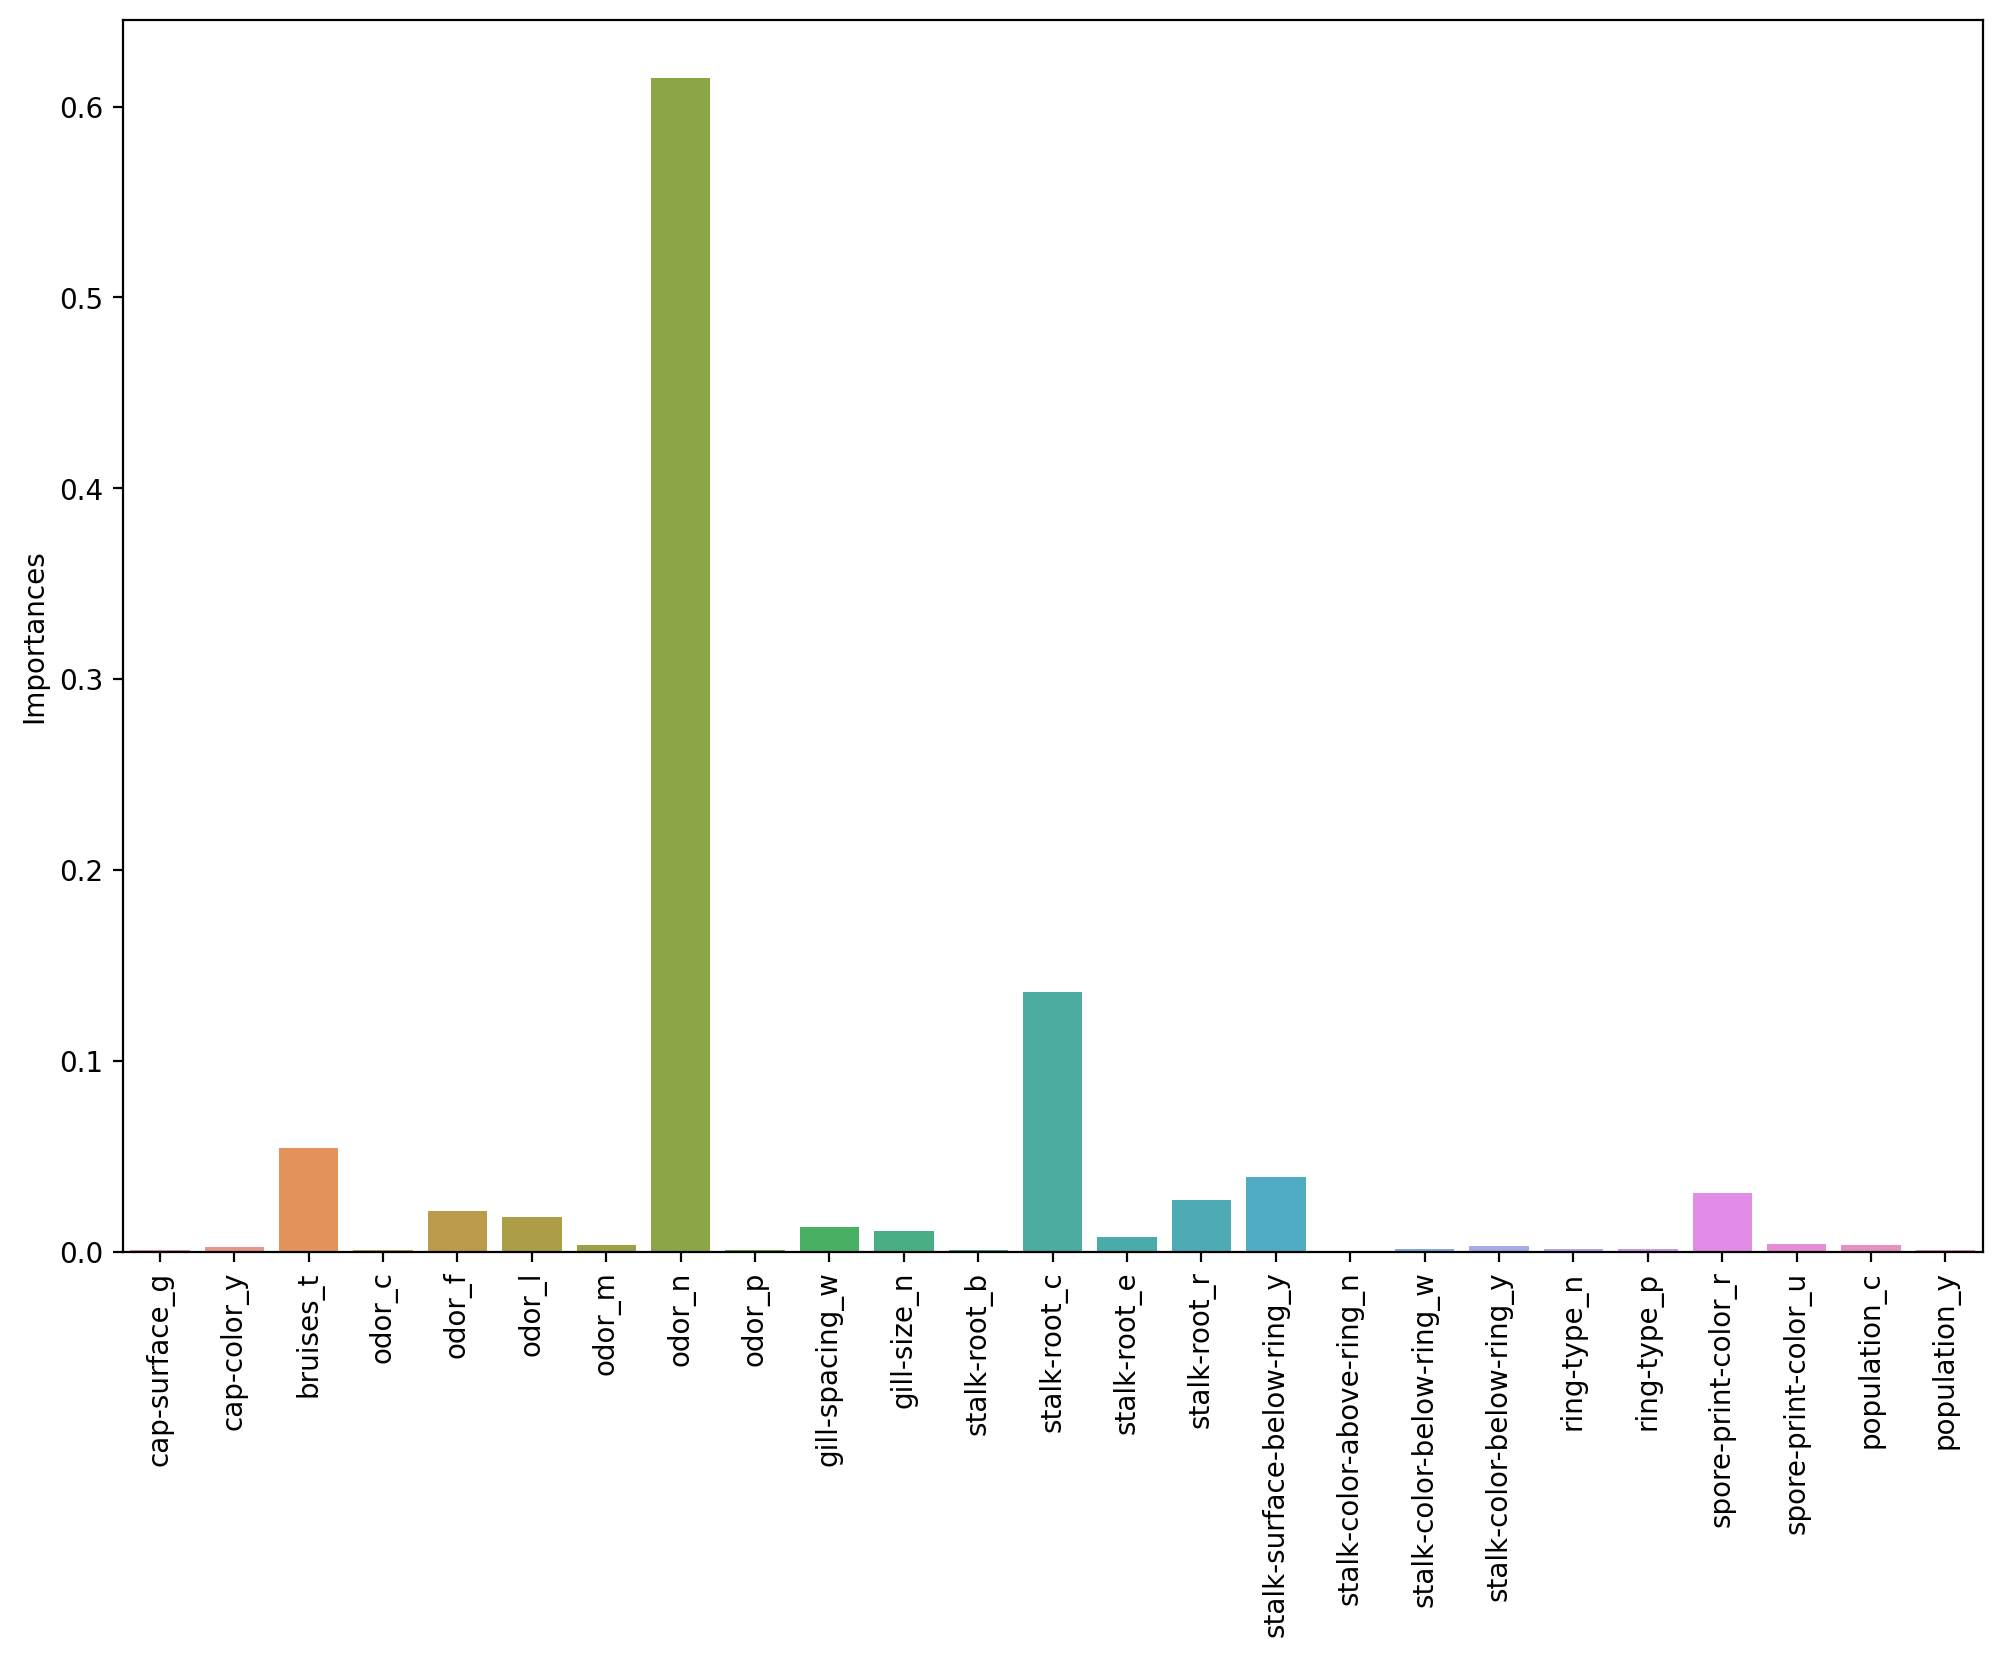

In [30]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=imp_feat,
           x=imp_feat.index,
           y = 'Importances')
plt.xticks(rotation=90);